In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# configuration
D = 2
N = 900

In [5]:
# create the data
mu1 = np.array([0, 0])
mu2 = np.array([5, 5])
mu3 = np.array([0, 5])

X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

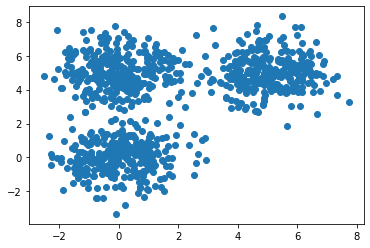

In [6]:
# visualize the data
plt.scatter(X[:, 0], X[:, 1]);
plt.show()

In [7]:
def d(u, v):
  diff = u - v
  return diff.dot(diff)

In [8]:
def cost(X, R, M):
  cost = 0
  for k in range(len(M)):
    for n in range(len(X)):
      cost += R[n,k]*d(M[k], X[n])
  return cost

In [9]:
def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
  N, D = X.shape
  # M = np.zeros((K, D))
  # R = np.zeros((N, K))
  
  exponents = np.empty((N, K))

  # initialize M to random
  initial_centers = np.random.choice(N, K, replace=False)
  M = X[initial_centers]

  # for k in range(K):
  #   M[k] = X[np.random.choice(N)]
  costs = []
  k = 0
  
  # grid_width = 5
  # grid_height = max_iter / grid_width
  # random_colors = np.random.random((K, 3))
  # plt.figure()
  
  # costs = np.zeros(max_iter)
  for i in range(max_iter):

    # colors = R.dot(random_colors)
    # plt.subplot(int(grid_width), int(grid_height), i+1);
    # plt.scatter(X[:, 0], X[:, 1], c=colors);

    k += 1
    # step 1: determine assignments / resposibilities
    # for k in range(K):
    #   for n in range(N):
    #     R[n, k] = np.exp(-beta * d(M[k], X[n])) / np.sum(np.fromiter((np.exp(-beta * d(M[k], X[n])) for j in range(K)), float))
    for k in range(K):
      for n in range(N):
        exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
    
    R = exponents / exponents.sum(axis=1, keepdims=True)

    # step 2: recalculate means
    # decent vectorization
    # for k in range(K):
    #   M[k] = R[:, k].dot(X) /  R[:, k].sum()

    # full vectorization
    M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
    # print("diff M:", np.abs(M - oldM).sum())

    c = cost(X, R, M)
    costs.append(c)
    # if i > 0:
    #   if np.abs(costs[i] - costs[i - 1]) < 0.1:
    #     break

    if i > 0:
      if np.abs(costs[-1] - costs[-2]) < 1e-5:
        break

    if len(costs) > 1:
      if costs[-1] > costs[-2]:
          pass
          # print("cost increased!")
          # print("M:", M)
          # print("R.min:", R.min(), "R.max:", R.max())

  if show_plots:
    plt.plot(costs)
    plt.title("Costs")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

  print("Final cost", costs[-1])
  return M, R

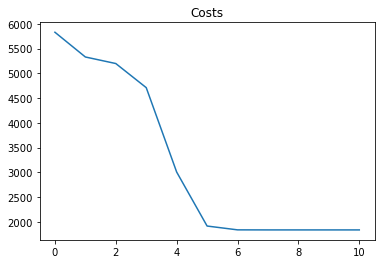

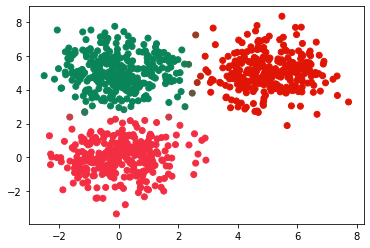

Final cost 1837.2626494729948


(array([[ 5.03441716e+00,  5.04440276e+00],
        [ 3.60354616e-02,  9.56076224e-03],
        [-4.24404696e-03,  5.05029216e+00]]),
 array([[3.87075162e-19, 9.99999982e-01, 1.75312774e-08],
        [5.18067958e-14, 9.99999984e-01, 1.60248798e-08],
        [4.27006355e-19, 1.00000000e+00, 4.36313335e-11],
        ...,
        [5.40760750e-09, 3.70242988e-10, 9.99999994e-01],
        [4.26142477e-09, 3.02277571e-08, 9.99999966e-01],
        [1.88683637e-10, 9.70427161e-15, 1.00000000e+00]]))

In [10]:
K = 3 
plot_k_means(X, K, beta=1.0, show_plots=True)

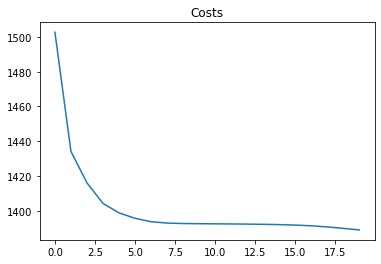

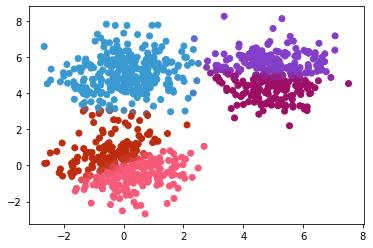

Final cost 1388.9575780106939


(array([[ 4.94760183,  4.19260105],
        [ 0.09239957,  5.11929471],
        [-0.49283482,  0.88428339],
        [ 0.40934648, -0.54653865],
        [ 5.01013091,  5.77626551]]),
 array([[4.22248890e-042, 4.27426753e-041, 2.66243473e-006,
         9.99997338e-001, 2.55482871e-065],
        [4.65588428e-026, 5.28486276e-017, 9.74749460e-001,
         2.52505399e-002, 2.59390661e-042],
        [6.53137736e-079, 7.20231234e-053, 1.23166779e-004,
         9.99876833e-001, 1.24222319e-106],
        ...,
        [7.64129366e-035, 1.00000000e+000, 3.44605239e-029,
         2.58429973e-049, 3.47392545e-034],
        [4.53567026e-035, 1.00000000e+000, 5.65106146e-016,
         2.56405146e-032, 2.84034767e-039],
        [2.28526919e-019, 1.00000000e+000, 1.83212741e-026,
         2.32526150e-042, 5.47354173e-020]]))

In [39]:
K = 5
plot_k_means(X, K, beta=3.0, show_plots=True)

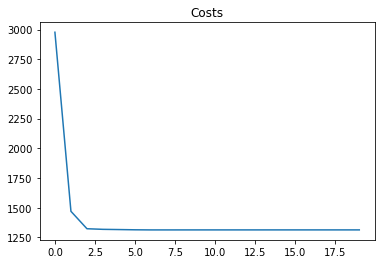

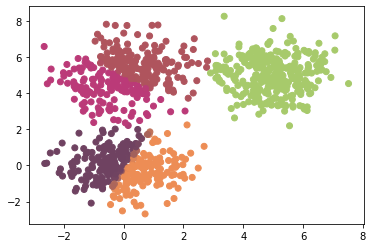

Final cost 1313.6129686016443


(array([[-0.66900228,  0.19999069],
        [ 0.64327103,  5.65298044],
        [ 5.00347733,  4.98930428],
        [ 0.79112785, -0.37412006],
        [-0.57727373,  4.21595382]]),
 array([[7.91101255e-020, 1.15502691e-159, 1.88288621e-178,
         1.00000000e+000, 1.62309513e-108],
        [4.67410728e-007, 5.72021273e-069, 1.77536428e-109,
         9.99999533e-001, 5.32074234e-036],
        [9.99724231e-001, 1.42488945e-208, 3.41306588e-304,
         2.75769131e-004, 5.60982232e-123],
        ...,
        [7.91306063e-125, 9.99999909e-001, 1.50368870e-110,
         3.77796508e-155, 9.12204663e-008],
        [4.57521362e-077, 9.21858338e-011, 5.46686941e-123,
         1.89552626e-104, 1.00000000e+000],
        [1.09955670e-118, 1.00000000e+000, 1.69249366e-064,
         2.37598080e-132, 6.20201016e-015]]))

In [40]:
K = 5
plot_k_means(X, K, beta=10.0, show_plots=True)